<a href="https://colab.research.google.com/github/cyber-noob/My-ML-Projects/blob/master/wine_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
%%time
wine = pd.read_csv('/content/drive/My Drive/kaggle/wine_shop/Knight ML Assignment/Data/train.csv')    #Read csv file

CPU times: user 526 ms, sys: 83.9 ms, total: 610 ms
Wall time: 651 ms


In [28]:
#Percentage of nan values in the dataset
wine.isna().mean()*100

user_name             23.462018
country                0.042344
review_title           0.000000
review_description     0.000000
designation           28.608587
points                 0.000000
price                  6.737481
province               0.042344
region_1              15.430030
region_2              56.508221
winery                 0.000000
variety                0.000000
dtype: float64

"region_2" column has the highest percentage of NaNs with 56.5% followed by "designation", "region_1" and "price" with 28.6%, 15.43% and 6.73% respectively. We will be skipping user_name column because it is just a unique identification for each rows and practically anybody can have any different combination of usernames ultimately just adding noise to our data.

In [10]:
pd.set_option('display.max_colwidth', 200)
wine.head(3)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardonnay (South Eastern Australia),"Classic Chardonnay aromas of apple, pear and hay lead into a palate marked by decent intensity but also a bit of sweetness. Orange and candy notes run through the rather short finish.",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (WA)),"This wine is near equal parts Syrah and Merlot with the balance Cabernet Sauvignon. Aromas of blue fruit, vanilla, cherry and herb lead to full-bodied pit-fruit flavors that bring a sense of delic...",NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),"Barolo Conca opens with inky dark concentration and soothing aromas of black fruit, spice, cola, plum, prune and dried lavender buds. The nose presents those ethereal and delicate aromas, but in t...",Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo


If we look closely into "review_title" column we can see that it is comnbination of "designation" column followed by "variety" column and "region" column enclosed in brackets.
Eg:{

>'review_title' : Andrew Peace 2007 Peace Family Vineyard Chardonnay 
                      (South Eastern Australia)


>'designation' : Peace Family Vineyard


>'variety' : Chardonnay


>'region_1' : South Eastern Australia


}

Therefore we shall be ignoring these columns in our EDA






In [29]:
wine.drop(labels = ['user_name','designation','region_1','region_2'], axis = 1, inplace = True)
wine.dropna(inplace = True)
wine = wine.reset_index()
#Percentage of NaNs in our dataset
wine.isna().mean()*100

country               0.0
review_title          0.0
review_description    0.0
points                0.0
price                 0.0
province              0.0
winery                0.0
variety               0.0
dtype: float64

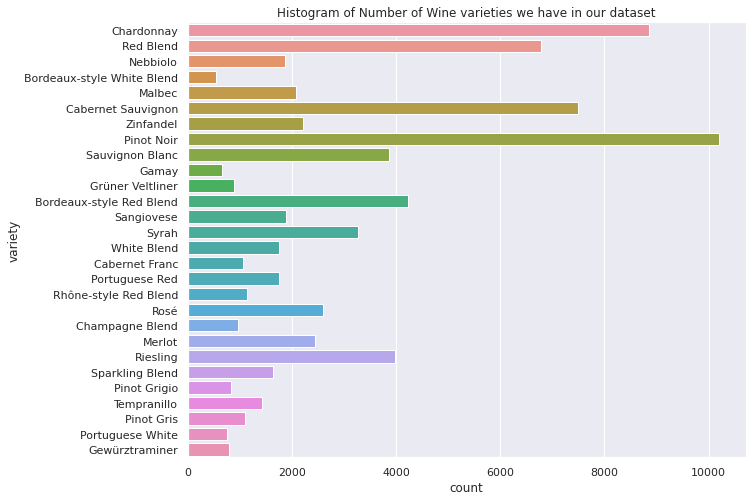

In [30]:
plt.figure(figsize = (10,8))
sns.countplot(y = wine['variety'])
plt.title('Histogram of Number of Wine varieties we have in our dataset')
plt.show()

#Cheap vs Expensive wine:



> Can I taste the difference between cheap and expensive wine? Can anybody really tell the difference?

I found out a really exciting blog that answers this question and if you are interested you can give it a read and you will surely find it interesting. Here you go, the link to the [blog](https://www.corbettbarr.com/cheap-vs-expensive-wine-can-you-taste-the-difference/).



> But let me explain it to you in brief. It turns out that most of us (the common people) are really not good at distinguishing the taste between expensive and cheap wines except the few, the so called "Experts".

Two experiments were conducted to try to find the anwer for this question


1.   **A blind taste test where people were introduced to taste wines ranging from $10 and below to $$150 and above**

The surprising results of this test were that in blind tastings of regular people, there is no correlation between the wines they like and the price of the wine. In fact, the paper found a slightly negative correlation, suggesting that regular people actually prefer cheaper wines.

Among "wine experts" (people with formal wine training), the test found a slight positive correlation between the price of wine and the scores assigned by the reviewers and there were 12% of them in the sample set.

2.   **A taste test but this time the participants were informed of their respective prices. An experiment conducted by Johan Almenberg and Anna Dreber of the American Association of Wine Economists to answer the question "When Does the Price Affect the Taste?"**

This test's results were not much of a surprise as Almenberg and Dreber’s test found that people (especially Women) assign a considerably higher rating to wine when informed before tasting that the wine retails for $40 a bottle.

The test found a positive correlation between the score given by the participants and the price of the wine.

Equiped with this knowledge lets try to explore our data in this viewpoint and check whether there is a positive correlation between the wine's price and its ratings/scores given by the user.






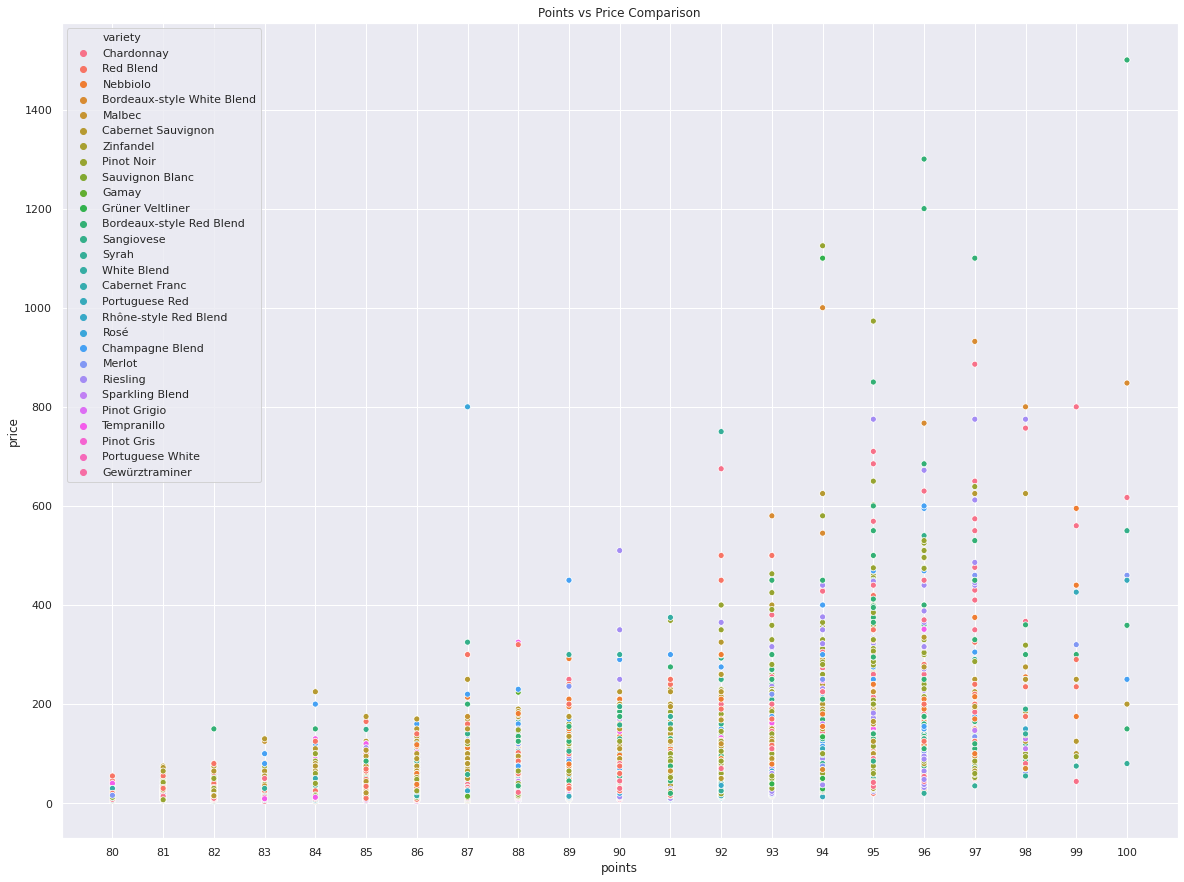

In [31]:
plt.figure(figsize=(20,15))
sns.scatterplot(wine.points,wine[wine.price <= 1500]['price'], hue = wine.variety)
plt.xticks(np.unique(wine.points))
plt.title('Points vs Price Comparison')
plt.show()

In [37]:
from scipy.stats import spearmanr
corr, _ = spearmanr(wine['points'],wine['price'])
print('Spearman correlation: %.3f' % corr)

Spearman correlation: 0.614


#Spearman's Correlation:


> The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables. Or put in simple words it measures whether the variables are directly proportional or inversely proportional.

The Spearman's Correlation ranges from -1 to 1 indicating "Negative Correlation" and "Positive Correlation" respectively with 0 indicating "Neutral".

From the above plot we could see that price variation increases as points increases and this positive correlation is confirmed by our Spearman's Correlation test with a score 0.614 that is close to 1.



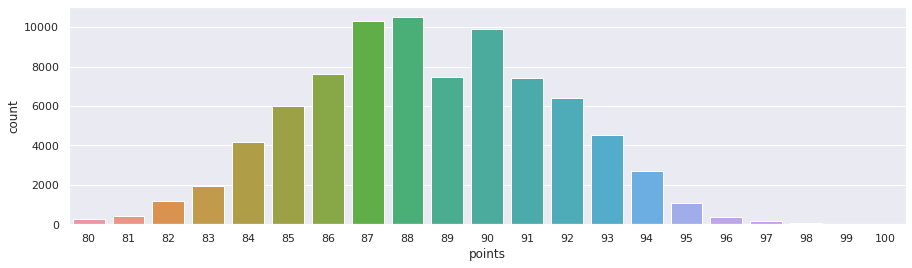

In [0]:
plt.figure(figsize = (15,4))
sns.set(font_scale = 1)
sns.countplot(wine['points'])
plt.show()

We can see that the points given to wine bottles are having a "Normal Distribution" indicting that there are no discrimination in judging the wine among the test users and most of them has given a reasonable score of 87-90 not too less and not too much.

In [0]:
!pip install geopandas
import geopandas as gpd

In [76]:
df = gpd.read_file('/content/drive/My Drive/earth/ne_110m_admin_0_countries.shp')
pd.set_option('display.max_colwidth',30)
df.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,...,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,920938,11,8374.0,2017,2007,...,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,Fidji,Φίτζι,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,MULTIPOLYGON (((180.00000 ...
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,53950935,16,150600.0,2017,2002,...,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,Tanzanie,Τανζανία,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,POLYGON ((33.90371 -0.9500...


In [78]:
wine.head()

,index,country,review_title,review_description,points,price,province,winery,variety
0,0,Australia,Andrew Peace 2007 Peace Fa...,Classic Chardonnay aromas ...,83,10.0,Australia Other,Andrew Peace,Chardonnay
1,1,US,North by Northwest 2014 Re...,This wine is near equal pa...,89,15.0,Washington,North by Northwest,Red Blend
2,2,Italy,Renato Ratti 2007 Conca (...,Barolo Conca opens with in...,94,80.0,Piedmont,Renato Ratti,Nebbiolo
3,3,France,Domaine l'Ancienne Cure 20...,It's impressive what a sma...,87,22.0,Southwest France,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,4,France,Château du Cèdre 2012 Le C...,"This ripe, sweet wine is r...",88,33.0,France Other,Château du Cèdre,Malbec


In [80]:
df1 = df.copy()
df1[df1['SOVEREIGNT'] == 'Italy']

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,...,ADM0_A3_IS,ADM0_A3_US,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
141,Admin-0 country,1,2,Italy,ITA,0,2,Sovereign country,Italy,ITA,0,Italy,ITA,0,Italy,ITA,0,Italy,Italy,ITA,Italy,None,Italy,I,Italian Republic,None,Italy,None,None,Italy,None,6,7,8,7,62137802,16,2221000.0,2017,2012,...,ITA,ITA,-99,-99,Europe,Europe,Southern Europe,Europe & Central Asia,5,5,5,-99,1,0.0,2.0,7.0,1159320919,Q38,إيطاليا,ইতালি,Italien,Italy,Italia,Italie,Ιταλία,इटली,Olaszország,Italia,Italia,イタリア,이탈리아,Italië,Włochy,Itália,Италия,Italien,İtalya,Ý,意大利,MULTIPOLYGON (((10.44270 4...


In [0]:
#wine contains country name as 'US' and our geographical polygons dataset contains country name as 'United States of America' so lets replace that.
df['SOVEREIGNT'].replace({'United States of America': 'US'}, inplace = True)    

In [0]:
df = df[['SOVEREIGNT', 'geometry']]
df.rename(columns = {'SOVEREIGNT':'country'}, inplace = True)
merged = pd.merge(df, wine, on = 'country', how = 'outer')

In [0]:
!pip install mapclassify

In [0]:
merged = merged[['country', 'geometry', 'price']]

In [0]:
merged.dropna(inplace=True)
merged = merged.reset_index()

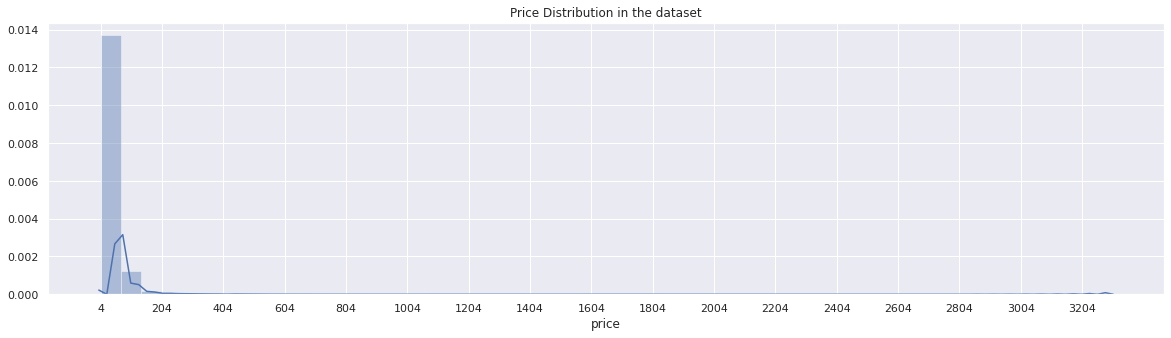

In [145]:
plt.figure(figsize = (20,5))
sns.distplot(merged['price'])
plt.xticks(np.arange(min(merged['price']), max(merged['price'])+1, 200))
plt.title('Price Distribution in the dataset')
plt.show()

Histogram clearly shows that most the wine cost below 204 which is very cheap compared to 3204 in out dataset. This is a clear indicator that our dataset suffers from huge outliers. 

Now lets try to figure out which country sells the most expensive wine

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 34
  Warn("Warning: setting k to %d" % k_q, UserWarning)


CPU times: user 2min 10s, sys: 1.07 s, total: 2min 11s
Wall time: 2min 11s


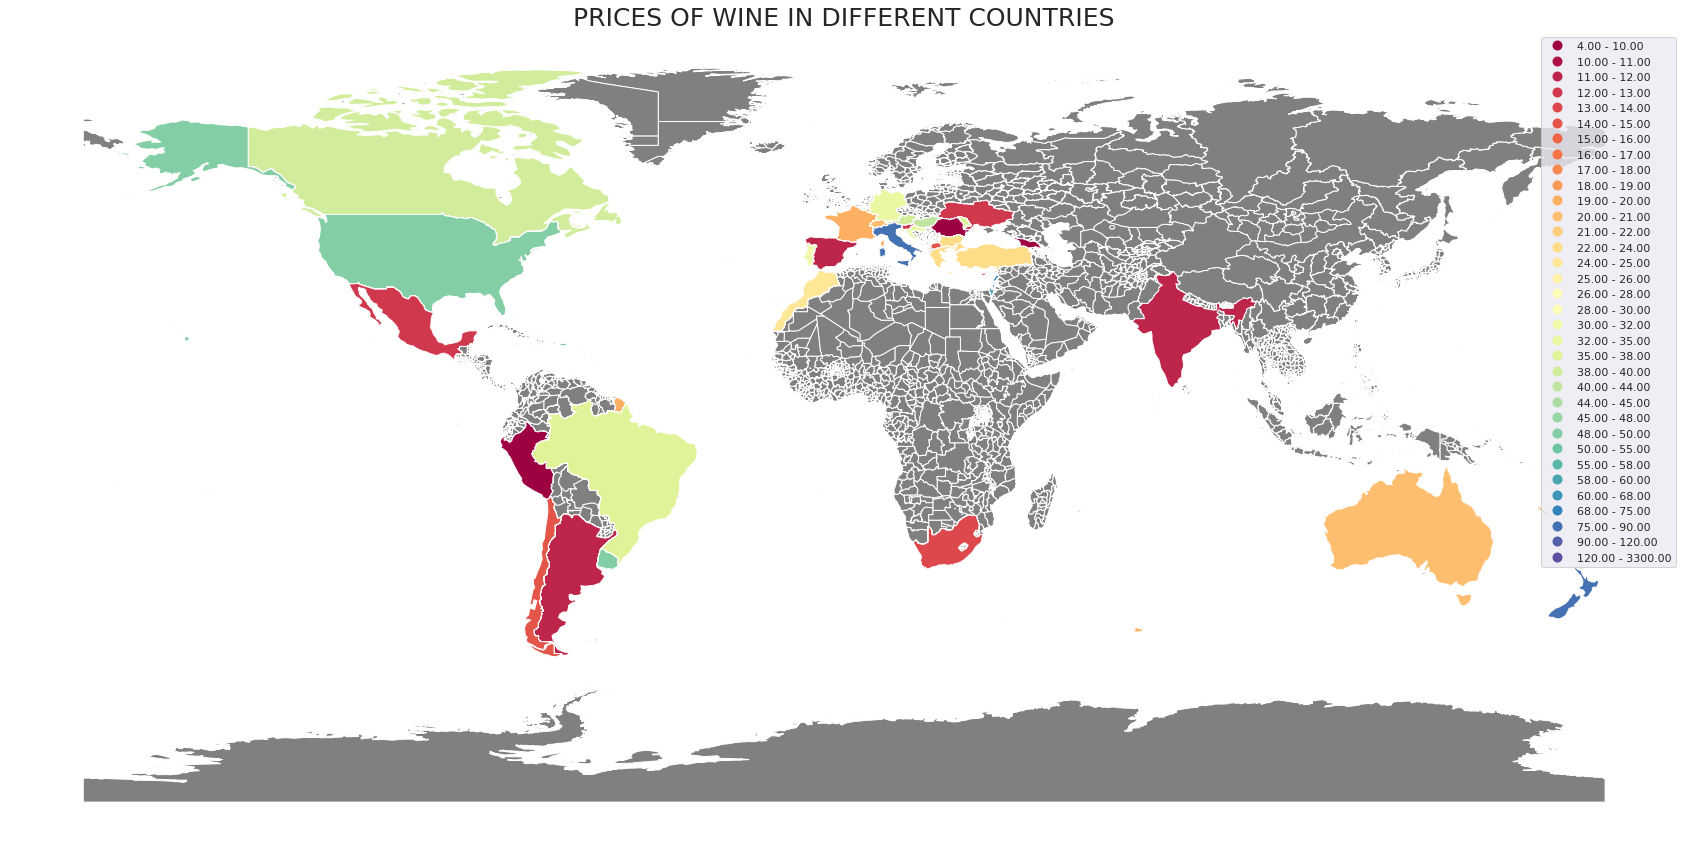

In [133]:
%%time
%matplotlib inline
ax = df.plot(color = 'grey', figsize = (30,15))
merged.plot(ax = ax, column = 'price', cmap = 'Spectral', figsize=(30,15), scheme='quantiles',  
                  k=40, legend = True);
ax.set_axis_off()
ax.set_title('PRICES OF WINE IN DIFFERENT COUNTRIES', fontdict= {'fontsize':25})

1.   **Countries where Wine are cheap**

      * Peru
      * India
      * Romania

2.   **Countries where Wine are expensive**

      * Italy
      * New Zealand

> **[Note: Grey portions in the map indicate that no data is available for that country in the dataset we use]**




So far so good, we were able to locate which countries sell most expensive and cheap wine but now let's try to figure out which is the most expensive wine in our dataset.

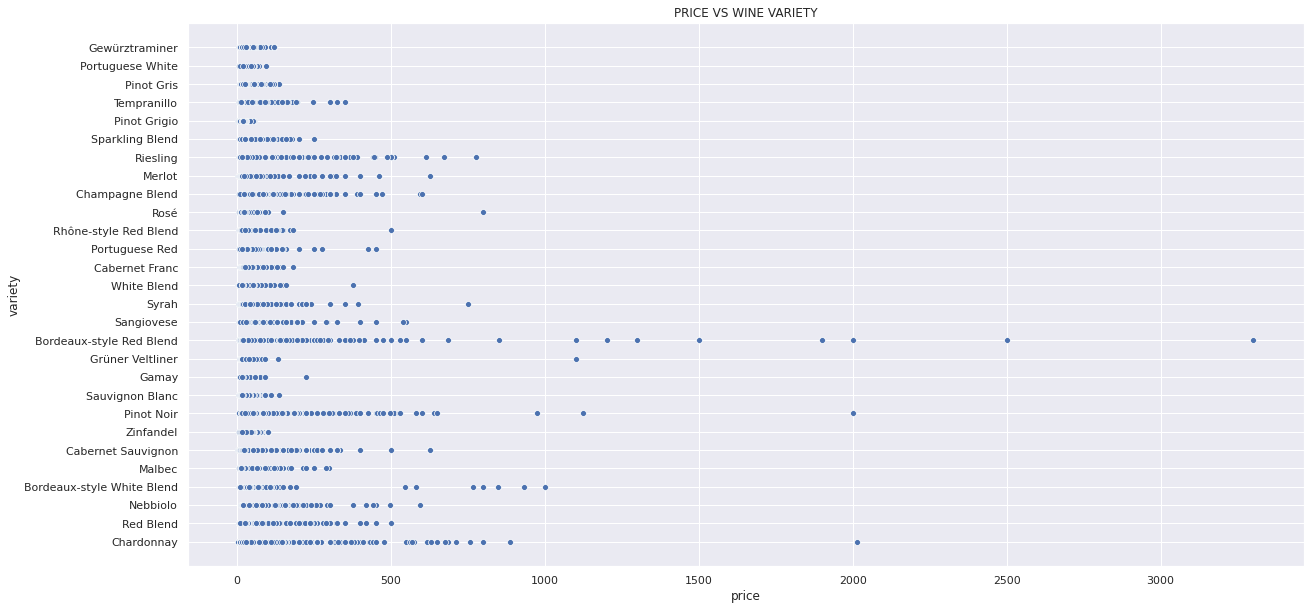

In [146]:
plt.figure(figsize = (20,10))
sns.scatterplot(wine['price'], wine['variety'])
plt.title('PRICE VS WINE VARIETY')
plt.show()

And the winner is Bordeaux-style Red Blend wine with the highest outliers compared to the ones in our dataset.(Most expensive one)

In [0]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
points,82657.0,88.544564,3.099649,80.0,86.0,88.0,91.0,100.0
price,77088.0,36.922232,43.698346,4.0,18.0,27.0,45.0,3300.0


In [0]:
temp = []
for i in range(101): 
  temp.append([i,np.nanpercentile(wine['price'],i)]) 
temp = pd.DataFrame(temp, columns = ['percentile','price'])
temp.head()

In [0]:
temp = temp.merge(wine, on = 'price', how = 'outer')

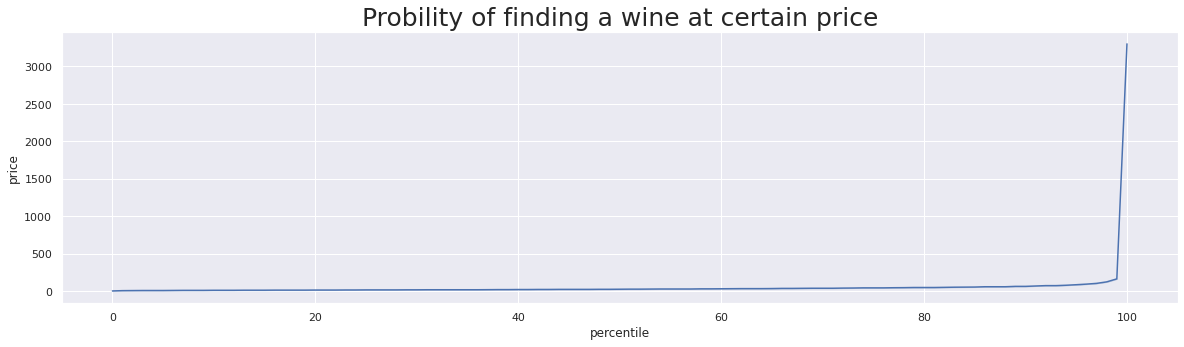

In [0]:
plt.figure(figsize = (20,5))
sns.lineplot(temp['percentile'], temp['price'])
plt.title('Probility of finding a wine at certain price', fontdict={'fontsize':25})
plt.show()

In [0]:
print('99th percentile : ', np.nanpercentile(wine['price'],99))
print('Max price :', max(wine['price']))

99th percentile :  165.0
Max price : 3300.0




>This shows that there is 99% probability that one can find a wine bottle for a price on or below 165 and the rest of the data suggests a strong outlier that extends upto 3300 (Really unlucky ones to find a wine at that price). This findings can be attributed to the fact that each country has its own pricing for the same wine (geographical location dependent).



#Now lets analyse some customer reviews

In [0]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

In [0]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in wine['review_description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

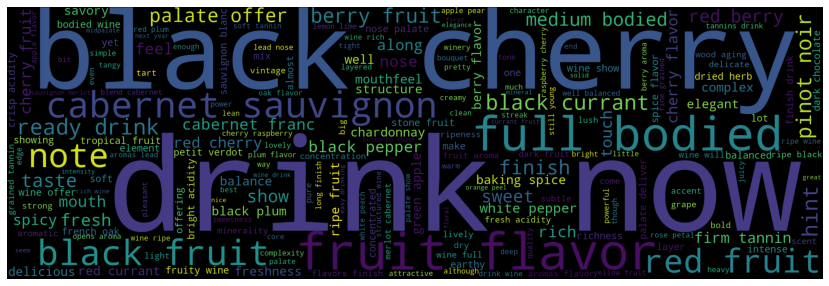

In [0]:
wordcloud = WordCloud(width = 2400, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                        
plt.figure(figsize = (30,5)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show()

Our first look into the wordcloud shows that most of the reviews concentrate on flavours and texture of the drink showing an overall positive view on all the wine varities reviewed.



> **END NOTES :** From our analysis I would like to conclude that the price of a wine variety is strongly dependent on 

1.   Points
2.   Location and
3.   User_reviews





